In [671]:
# Implement the main EM algorithm for the mixture of Gaussians model
    # Input: data file, number of clusters, number of iterations
    # Output: the final parameters of the model

In [672]:
# Expectation-Maximization algorithm
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
from tqdm import tqdm
from scipy.stats import multivariate_normal

### A) The gaussian 2-dim data on file  2gaussian.txt  has been generated  using a mixture  of  two Gaussians, each  2-dim, with the parameters below. Run the EM algorithm with random initial values to recover the parameters.
mean_1 [3,3]); cov_1 = [[1,0],[0,3]]; n1=2000 points

mean_2 =[7,4]; cov_2 = [[1,0.5],[0.5,1]]; ; n2=4000 points

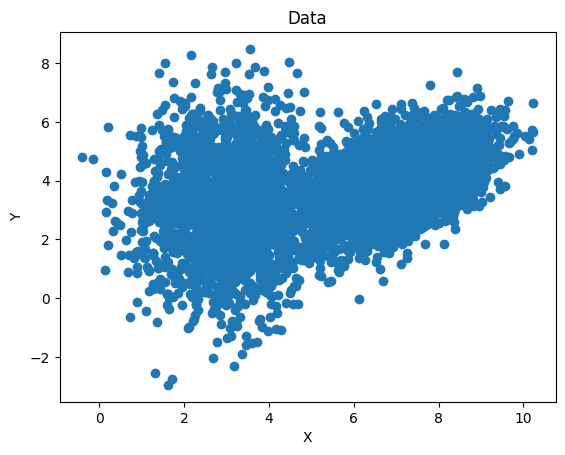

In [673]:
# read input data from 2gaussian.txt

data = np.loadtxt("2gaussian.txt")

# plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
# KMeans: 
    # Initialize K cluster centers
    # Assign each data point to the nearest cluster center
    # Update cluster centers
    # Repeat until convergence (no change in cluster centers)
    # Termination criteria: max iterations, no change in cluster centers, etc.
def euclidean(x, y):
    return np.linalg.norm(x - y)

def kmeans(data, k, similarity, max_iter=100):
    iter = 0
    # randomly assign cluster centers
    centers = data[np.random.choice(data.shape[0], k, replace=False)]
    print("Initial centers: ", centers)
    
    for i in tqdm(range(max_iter)):
        iter +=1
        # E-step (assign best memberships closest to centers)
        # check Raghu's post for initialization values
        clusters = [[] for _ in range(k)]
        for x in data:
            cluster = min(range(k), key=lambda c: similarity(x, centers[c]))
            clusters[cluster].append(x)

        # Update cluster centers - M-step (not changing memberships)
        new_centers = [np.mean(cluster, axis=0) for cluster in clusters]

        # Check for convergence
        # if np.allclose(centers, new_centers, rtol=1e-8):
        if np.array_equal(centers, new_centers):
            print("Converged after {} iterations".format(iter))
            return centers, clusters
        

        centers = new_centers
    print("Converged after {} iterations".format(iter))
    return centers, clusters


In [704]:
gaussian_kmeans = kmeans(data, 2, euclidean)

Initial centers:  [[ 8.06774003  4.37645832]
 [ 4.19509066 -0.49147452]]


  7%|▋         | 7/100 [00:00<00:04, 19.93it/s]

Converged after 8 iterations


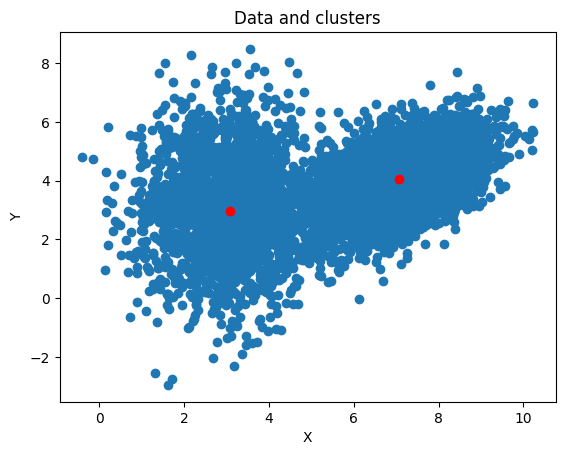

mu [[3.08345703 2.97131323]
 [7.07338226 4.05229137]]
pi [0.35233333 0.64766667]
covariance matrix 1:  [[ 1.11564198 -0.12282335]
 [-0.12282335  2.73193876]]
covariance matrix 2:  [[0.86221229 0.35893216]
 [0.35893216 0.94801322]]


In [696]:
mu = np.array(gaussian_kmeans[0])
pi = np.array([len(cluster) / data.shape[0] for cluster in gaussian_kmeans[1]])
# plot for visualization
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(mu[:, 0], mu[:, 1], c="red")
plt.title("Data and clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
print("mu", mu)
print("pi", pi)
print("covariance matrix 1: ", np.cov(np.array(gaussian_kmeans[1][0]).T))
print("covariance matrix 2: ", np.cov(np.array(gaussian_kmeans[1][1]).T))

In [677]:
#implement one gaussian:

# Parameters: x, mu, sigma
# Output: probability density of the data point x
# can use scipy.stats.multivariate_normal.pdf

def gaussian(x, mu, sigma):
    return multivariate_normal.pdf(x, mu, sigma)

first_gaussian = gaussian(data, mu[0], np.cov(data.T))
second_gaussian = gaussian(data, mu[1], np.cov(data.T))



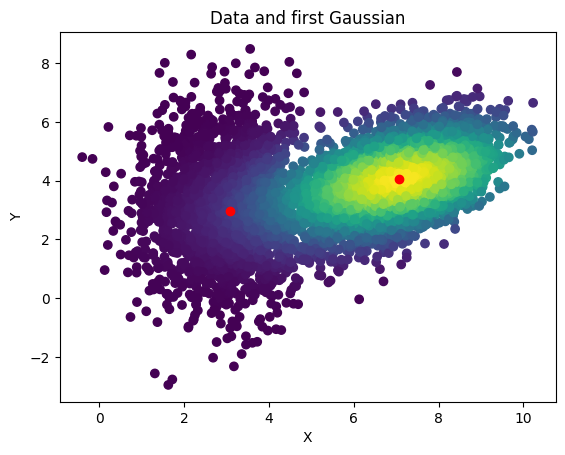

In [678]:
# plot for visualization
plt.scatter(data[:, 0], data[:, 1], c=first_gaussian)
plt.scatter(mu[:, 0], mu[:, 1], c="red")
plt.title("Data and first Gaussian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


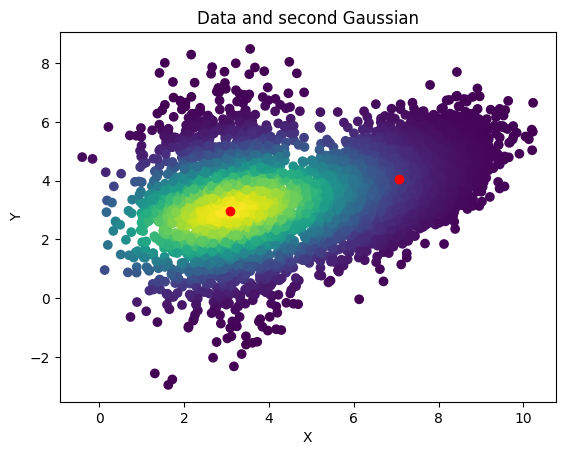

In [679]:
# plot second gaussian
plt.scatter(data[:, 0], data[:, 1], c=second_gaussian)
plt.scatter(mu[:, 0], mu[:, 1], c="red")
plt.title("Data and second Gaussian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


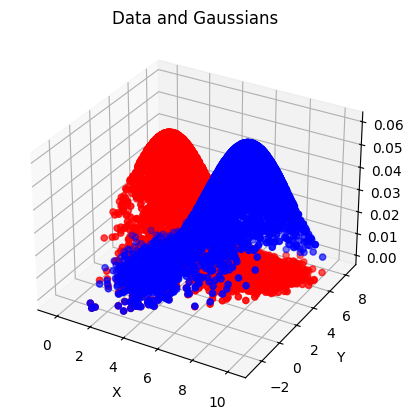

In [680]:
# plot both gaussians on the same 3d plot, color code each one differently
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], first_gaussian, c="blue")
ax.scatter(data[:, 0], data[:, 1], second_gaussian, c="red")
plt.title("Data and Gaussians")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [681]:
# Implement the EM algorithm for the mixture of Gaussians model
# Parameters: data, number of clusters, number of iterations, sigma (covariance matrix)
# Output: the final parameters of the model

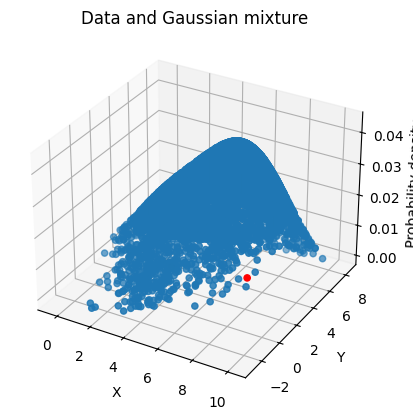

In [682]:
# Mixture function for these 2 Gaussians:
def mixture(data, mu, pi):
    return pi[0] * gaussian(data, mu[0], np.cov(data.T)) + pi[1] * gaussian(data, mu[1], np.cov(data.T))

gaussian_mixture_2 = mixture(data, mu, pi)

# plot the mixture of both gaussians within the same 3d plot:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], gaussian_mixture_2)
ax.scatter(mu[:, 0], mu[:, 1], 0, c="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability density')
plt.title("Data and Gaussian mixture")
plt.show()



### B) Same problem for 2-dim data on file 3gaussian.txt , generated using a mixture of three Gaussians. Verify your  findings against the true parameters used generate the data below.
mean_1 = [3,3] ; cov_1 = [[1,0],[0,3]]; n1=2000

mean_2 = [7,4] ; cov_2 = [[1,0.5],[0.5,1]] ; n2=3000

mean_3 = [5,7] ; cov_3 = [[1,0.2],[0.2,1]]    ); n3=5000


In [683]:
df_3 = np.loadtxt("3gaussian.txt")

In [684]:
gaussian_kmeans_3 = kmeans(df_3, 3, euclidean)

Initial centers:  [[2.71770047 4.93008293]
 [5.04060205 6.50375618]
 [5.59646661 6.64568838]]


100%|██████████| 100/100 [00:09<00:00, 10.99it/s]

Converged after 100 iterations


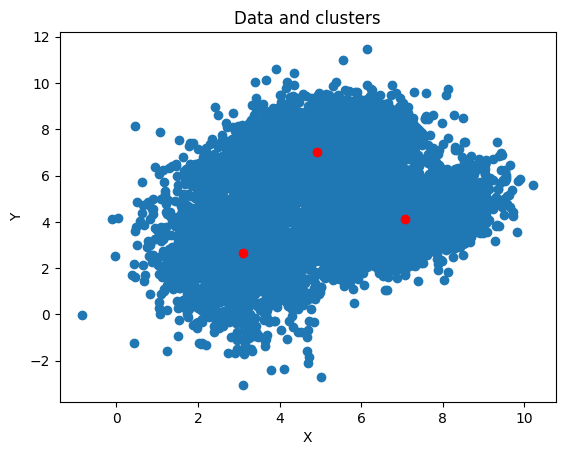

In [685]:
# plot for visualization
plt.scatter(df_3[:, 0], df_3[:, 1])
centers = np.array(gaussian_kmeans_3[0])
plt.scatter(centers[:, 0], centers[:, 1], c="red")
plt.title("Data and clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


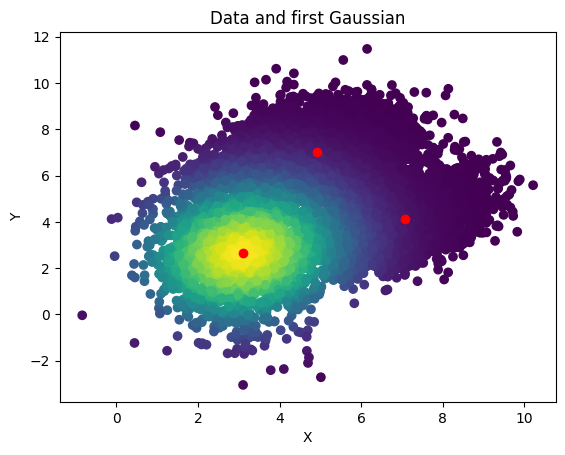

mu [[3.10424435 2.64968899]
 [4.91180979 7.01546364]
 [7.06525517 4.12124159]]


In [686]:
# produce gausians for each of the 3 clusters:
first_gaussian_3 = gaussian(df_3, centers[0], np.cov(df_3.T))
second_gaussian_3 = gaussian(df_3, centers[1], np.cov(df_3.T))
third_gaussian_3 = gaussian(df_3, centers[2], np.cov(df_3.T))


# plot for visualization
plt.scatter(df_3[:, 0], df_3[:, 1], c=first_gaussian_3)
plt.scatter(centers[:, 0], centers[:, 1], c="red")
plt.title("Data and first Gaussian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

print("mu", centers)
# 3,3 , 7,4 , 5,7

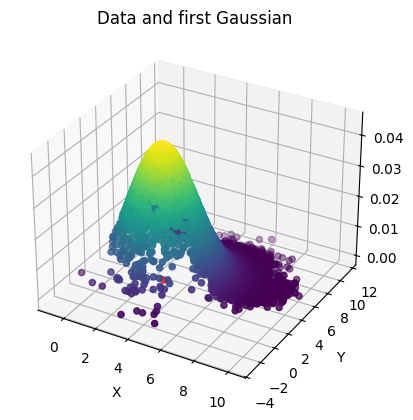

In [687]:
# plot the distribution within 3 dimensions:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_3[:, 0], df_3[:, 1], first_gaussian_3, c=first_gaussian_3)
ax.scatter(centers[:, 0], centers[:, 1], 0, c="red")
plt.title("Data and first Gaussian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


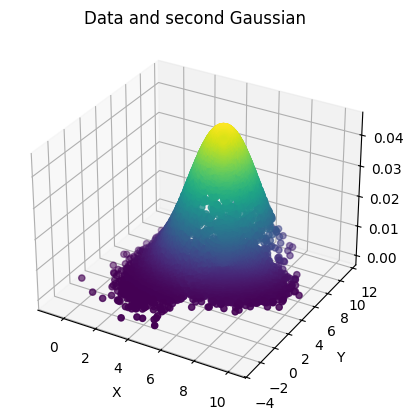

In [688]:
# plot the distribution within 3 dimensions:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_3[:, 0], df_3[:, 1], second_gaussian_3, c=second_gaussian_3)
ax.scatter(centers[:, 0], centers[:, 1], 0, c="red")
plt.title("Data and second Gaussian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


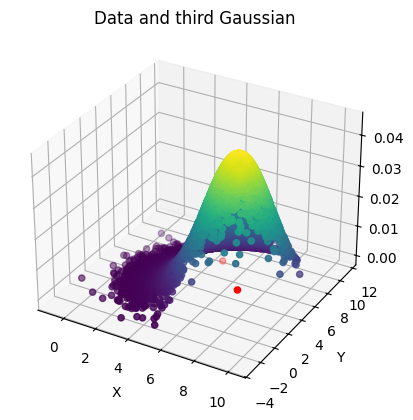

In [689]:
# plot the distribution within 3 dimensions:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_3[:, 0], df_3[:, 1], third_gaussian_3, c=third_gaussian_3)
ax.scatter(centers[:, 0], centers[:, 1], 0, c="red")
plt.title("Data and third Gaussian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
# mixture:
def mixture_3(data, mu, pi):
    return pi[0] * gaussian(data, mu[0], np.cov(data.T)) + pi[1] * gaussian(data, mu[1], np.cov(data.T)) + pi[2] * gaussian(data, mu[2], np.cov(data.T))
gaussian_mixture_3 = mixture_3(df_3, centers, [1/3, 1/3, 1/3])




[0.64716667 0.35283333]


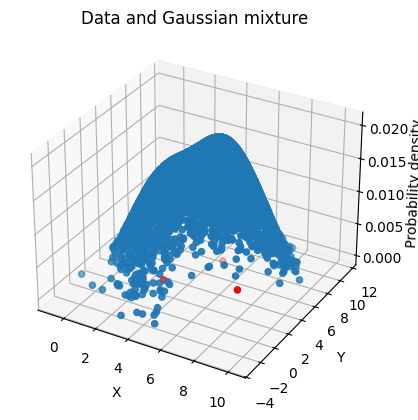

In [691]:
# plot the mixture on a 3-d plot:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_3[:, 0], df_3[:, 1], gaussian_mixture_3)
ax.scatter(centers[:, 0], centers[:, 1], 0, c="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability density')
plt.title("Data and Gaussian mixture")
plt.show()




In [692]:
# covariances of the mixture:
print("covariance matrix 1: ", np.cov(np.array(gaussian_kmeans_3[1][0]).T))
print("covariance matrix 2: ", np.cov(np.array(gaussian_kmeans_3[1][1]).T))
print("covariance matrix 3: ", np.cov(np.array(gaussian_kmeans_3[1][2]).T))

covariance matrix 1:  [[ 1.11987604 -0.09149586]
 [-0.09149586  2.23946661]]
covariance matrix 2:  [[1.07083589 0.2550728 ]
 [0.2550728  0.90087142]]
covariance matrix 3:  [[0.86996852 0.35734333]
 [0.35734333 0.95038664]]
